In [1]:
import pandas as pd
import numpy as np
import matplotlib as mth

In [3]:
dollar=pd.read_excel("./datas/dolarBRL2011.2021.xlsx")
barril=pd.read_excel("./datas/petroleo.2011.2021.xlsx")

# Tratamento de dos dados
- Mudança de formato para datetime
- Garantia da ordenação correta
- 
# Enriquecimento de dados
- Adição de informações
- Plotagens iniciais
- Compreensão univariada

In [5]:
dollar['V.Médio']=(dollar['Máxima']+dollar['Mínima'])/2
dollar['Data']=pd.to_datetime(dollar['Data'],format='%d/%m/%Y')
dollar.sort_values('Data',inplace=True)
dollar.set_index('Data',inplace=True)
dollar.rename_axis('Período',inplace=True)


In [7]:
barril['V.Médio']=(barril['Máxima']+barril['Mínima'])/2
barril['Data']=pd.to_datetime(barril['Data'],format='%d/%m/%Y')
barril.sort_values('Data',inplace=True)
barril.set_index('Data',inplace=True)
barril.rename_axis('Período',inplace=True)

In [75]:
dollar['VUS.Norm']=dollar['V.Médio']/dollar['V.Médio'].max()
barril['VBar.Norm']=barril['V.Médio']/barril['V.Médio'].max()

In [8]:
print(barril.isna().sum())
print(dollar.isna().sum())

Último      0
Abertura    0
Máxima      0
Mínima      0
Vol.        0
Var%        0
V.Médio     0
dtype: int64
Último      0
Abertura    0
Máxima      0
Mínima      0
Var%        0
V.Médio     0
dtype: int64


In [10]:
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose

# GERAL

<AxesSubplot:xlabel='Período'>

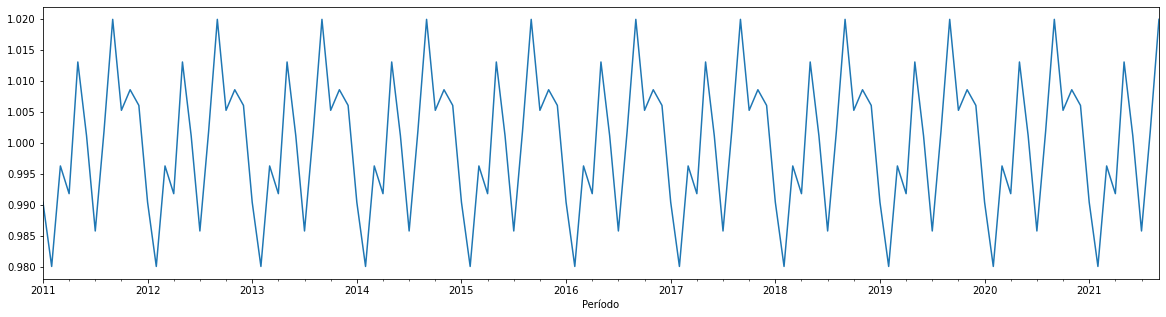

In [59]:
result0=seasonal_decompose(dollar.loc[:,'V.Médio'],model='multiplicable',period=12)
result0.seasonal.plot(figsize=(20,5))

# CONTROLE DE PREÇO

## Dollar

<AxesSubplot:xlabel='Período'>

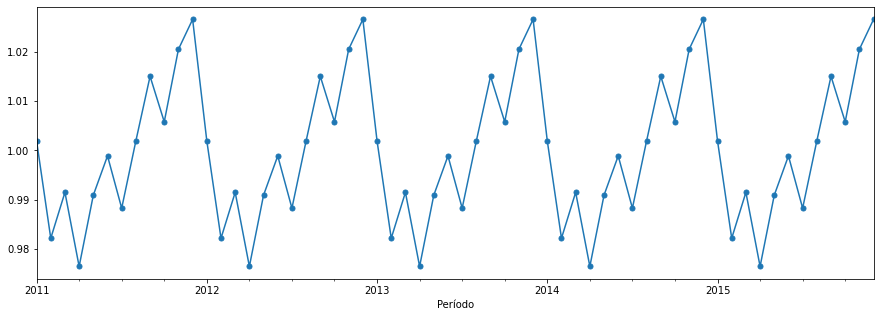

In [67]:
result=seasonal_decompose(dollar.loc[:'2015','V.Médio'],model='multiplicable',period=12)
result.seasonal.plot(figsize=(15,5),marker='o',markersize=5)

<AxesSubplot:xlabel='Período'>

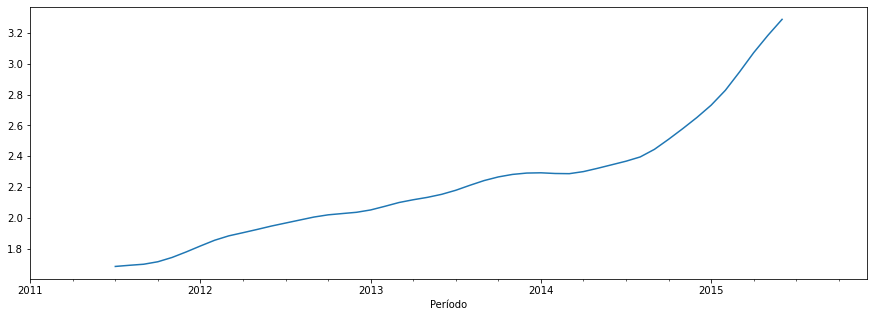

In [35]:
result.trend.plot(figsize=(15,5))

## Barril

<AxesSubplot:xlabel='Período'>

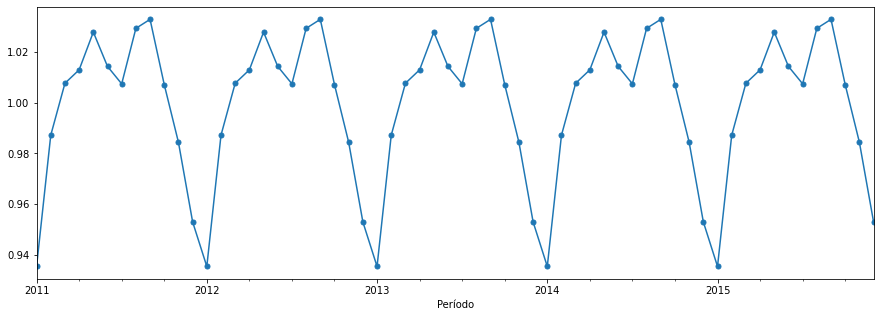

In [70]:
result2=seasonal_decompose(barril.loc[:'2015','V.Médio'],model='multiplicable',period=12)
result2.seasonal.plot(figsize=(15,5),markersize=5,marker='o')

<AxesSubplot:xlabel='Período'>

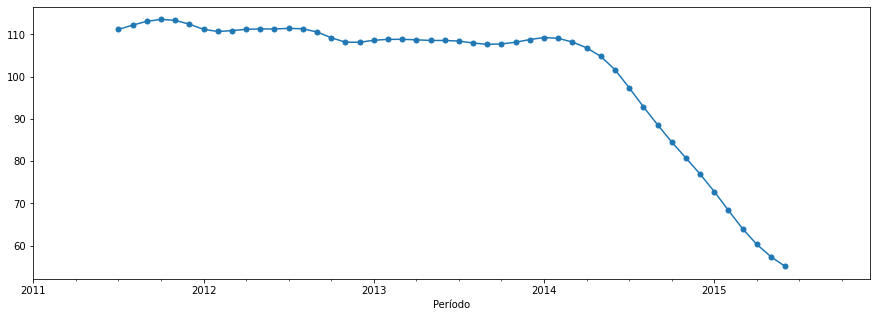

In [71]:
result2.trend.plot(figsize=(15,5),markersize=5,marker='o')

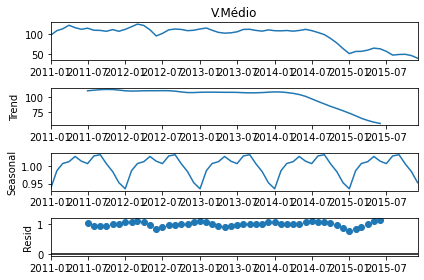

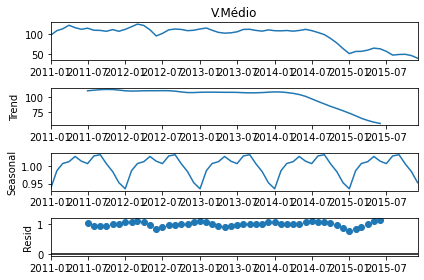

In [43]:
result2.plot()


# PPI

<AxesSubplot:xlabel='Período'>

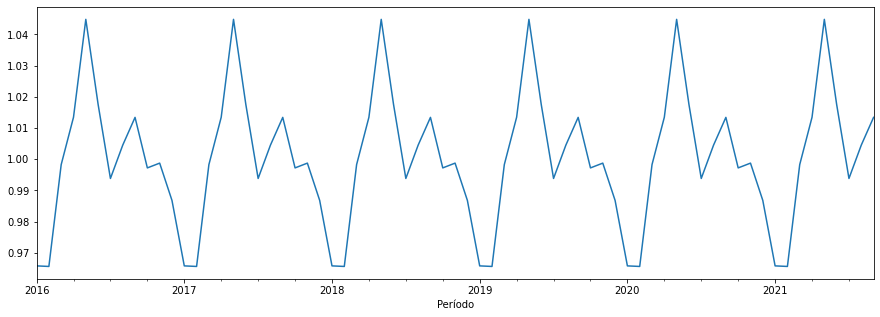

In [93]:
result3=seasonal_decompose(dollar.loc['2016':,'V.Médio'],model='multiplicable',period=12)
result3.seasonal.plot(figsize=(15,5))

<AxesSubplot:xlabel='Período'>

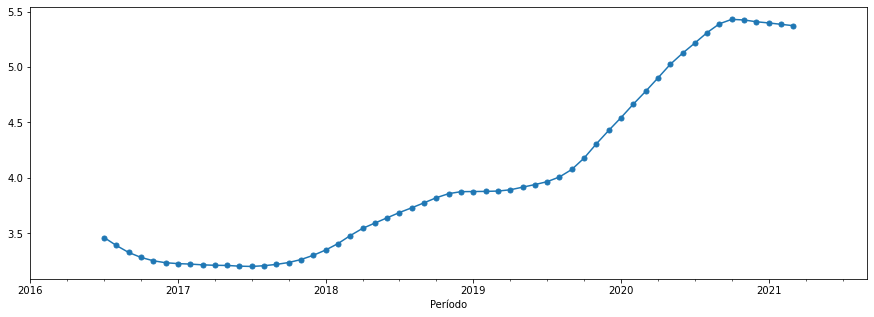

In [73]:
result3.trend.plot(figsize=(15,5),markersize=5,marker='o')

<AxesSubplot:xlabel='Período'>

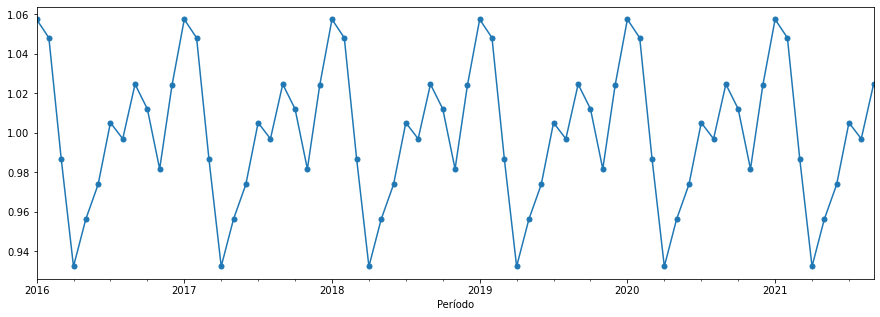

In [74]:
result4=seasonal_decompose(barril.loc['2016':,'V.Médio'],model='multiplicable',period=12)
result4.seasonal.plot(figsize=(15,5),markersize=5,marker='o')

## RESUMO PPI NORMALIZADO

In [84]:
resumo_d=seasonal_decompose(dollar.loc[:'2015','VUS.Norm'])
resumo_b=seasonal_decompose(barril.loc[:'2015','VBar.Norm'])

<AxesSubplot:xlabel='Período'>

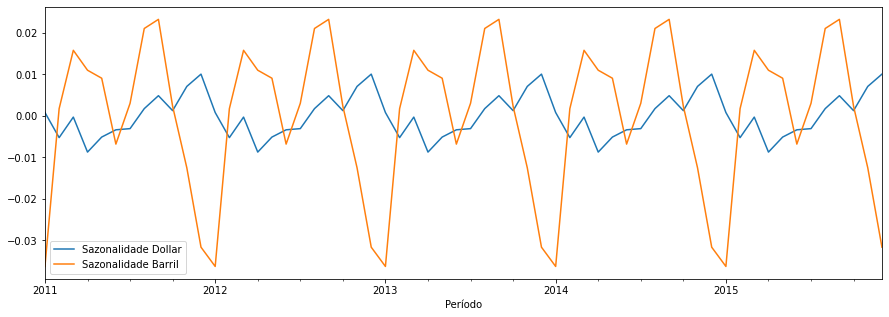

In [90]:
resumo_d.seasonal.plot(label='Sazonalidade Dollar',legend=True,figsize=(15,5))
resumo_b.seasonal.plot(label='Sazonalidade Barril',legend=True,figsize=(15,5))

In [86]:
resumo_d2=seasonal_decompose(dollar.loc['2016':,'VUS.Norm'])
resumo_b2=seasonal_decompose(barril.loc['2016':,'VBar.Norm'])

<AxesSubplot:xlabel='Período'>

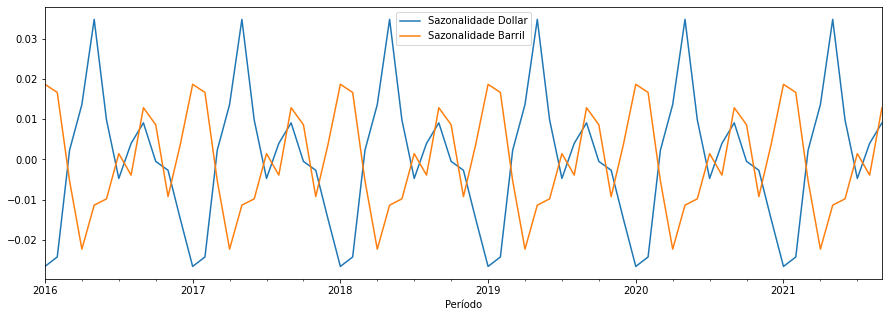

In [91]:
resumo_d2.seasonal.plot(label='Sazonalidade Dollar',legend=True,figsize=(15,5))
resumo_b2.seasonal.plot(label='Sazonalidade Barril',legend=True,figsize=(15,5))